<a href="https://colab.research.google.com/github/BrajanNieto/CompuVision/blob/main/CV_Labo1_MPPT_ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Computer Vision - Segmentación de imágenes y detección de bordes**

---



*   Este notebook se enfoca en aplicar técnicas fundamentales de visión por computadora para el procesamiento de imágenes. Incluye tres tareas principales: segmentación basada en color de frutas, detección de bordes en imágenes médicas de rayos X, y segmentación de señales de tráfico combinando umbrales de color y métodos de detección de bordes. El objetivo es practicar transformaciones RGB/HSV, filtrado y operadores clásicos como Sobel y Canny.

**Autores:**  

Nieto Espinoza, Brajan E.  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

Guedes del Pozo,  Rodrigo J.  
[rodrigo.guedes.d@utec.edu.pe](mailto:rodrigo.guedes.d@utec.edu.pe)

<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">      

---

In [1]:
# === Libraries===
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

##  1. Segmentación de frutas por color (RGB y HSV)

**Descripción**

A partir de la imagen con frutas de diferentes colores, realizar la
segmentación de las manzanas o las uvas (sólo una de ellas) utilizando umbrales de color.

### 1. Cargar la imagen y visualizarla en el formato RGB correcto.

Image  BGR


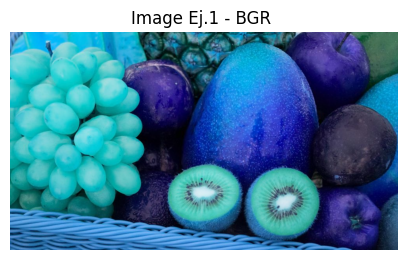

Image  RGB


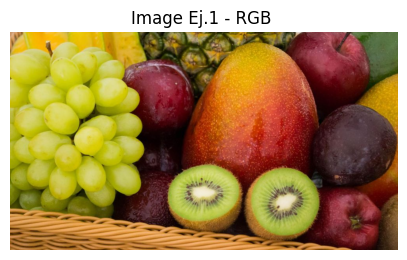

In [2]:
# URL del repositorio
raw_url = "https://raw.githubusercontent.com/BrajanNieto/CompuVision/main/Lab01_Images/Image1.jpg"
# mostrar imagen RGB con matplotlib
def show_rgb(img_rgb, title="", ax=None):
    if ax is None:
        plt.figure(figsize=(5,5))
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        ax.imshow(img_rgb)
        ax.set_title(title)
        ax.axis('off')
# Cargar bytes y decodificar con OpenCV
with urlopen(raw_url) as resp:
    img_bytes = resp.read()
img_array = np.frombuffer(img_bytes, np.uint8)
img_bgr = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
# Convertir BGR->RGB para visualizar correctamente
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# Visualización
print('Image  BGR')
show_rgb(img_bgr, "Image Ej.1 - BGR ")

print('Image  RGB')
show_rgb(img_rgb, "Image Ej.1 - RGB ")

### 2. Convertir la imagen a un espacio de color HSV.

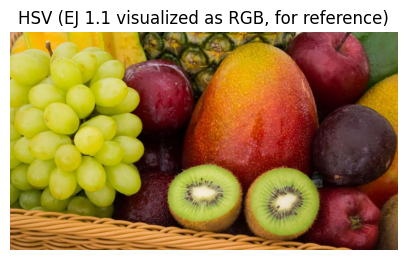

In [3]:
# BGR -> HSV (OpenCV usa H en [0,179], S y V en [0,255])
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Mostrar HSV convertido a RGB solo con fines de visualización
img_hsv_to_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
show_rgb(img_hsv_to_rgb, "HSV (EJ 1.1 visualized as RGB, for reference)")

### 3. Visualizar las bandas R, G, B, H, S, y V.

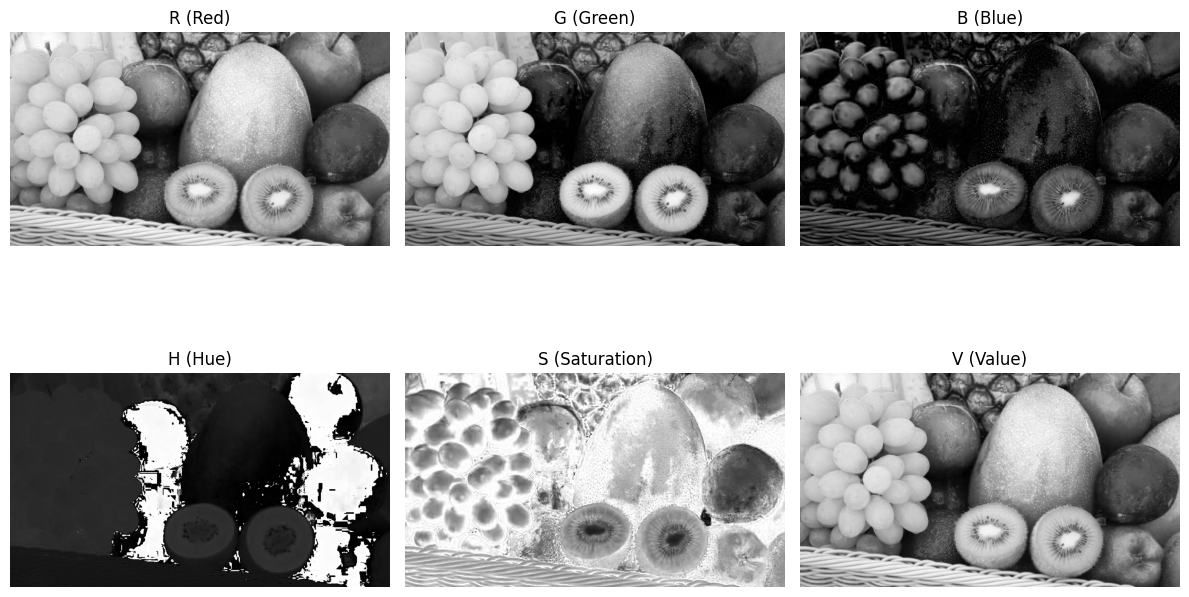

In [4]:
# Separar canales RGB
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Separar canales HSV
H, S, V = cv2.split(img_hsv)  # H: [0-179], S: [0-255], V: [0-255]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0,0].imshow(R, cmap='gray'); axs[0,0].set_title("R (Red)"); axs[0,0].axis('off')
axs[0,1].imshow(G, cmap='gray'); axs[0,1].set_title("G (Green)"); axs[0,1].axis('off')
axs[0,2].imshow(B, cmap='gray'); axs[0,2].set_title("B (Blue)"); axs[0,2].axis('off')

axs[1,0].imshow(H, cmap='gray'); axs[1,0].set_title("H (Hue)"); axs[1,0].axis('off')
axs[1,1].imshow(S, cmap='gray'); axs[1,1].set_title("S (Saturation)"); axs[1,1].axis('off')
axs[1,2].imshow(V, cmap='gray'); axs[1,2].set_title("V (Value)"); axs[1,2].axis('off')

plt.tight_layout()
plt.show()


###4. Experimentar con diferentes umbrales en las bandas para poder segmentar de la mejor forma una de las frutas mencionadas.

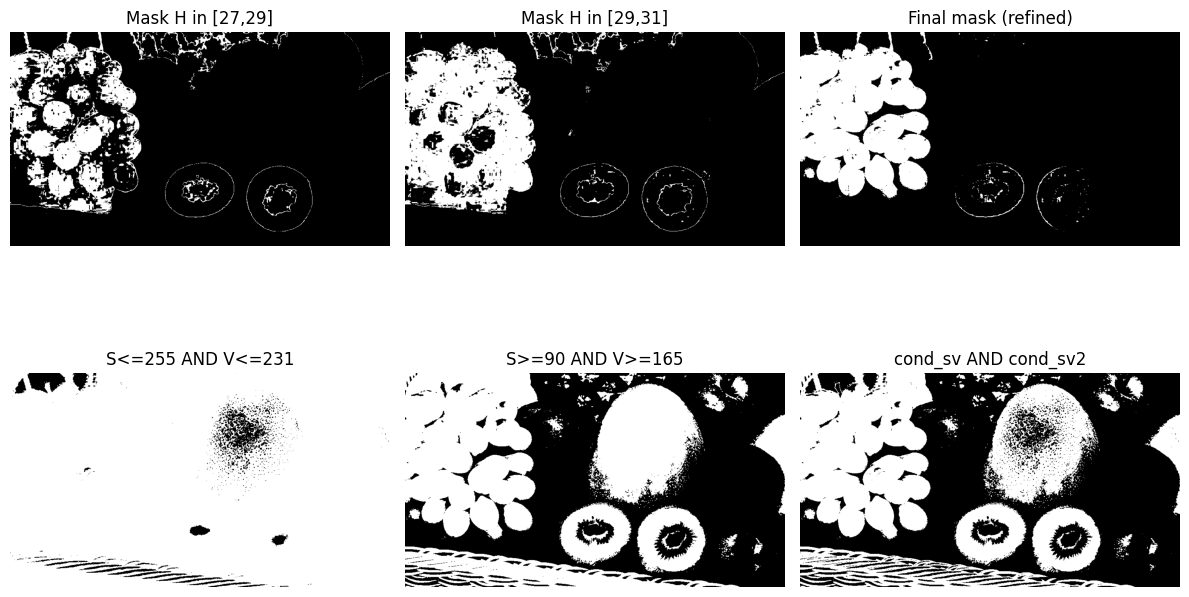

In [5]:
H, S, V = cv2.split(img_hsv)  # H:[0-179], S:[0-255], V:[0-255]
# Rango  bajo
lower1 = np.array([27,   0, 0], dtype=np.uint8)
upper1 = np.array([29,  255, 255], dtype=np.uint8)
mask1 = cv2.inRange(img_hsv, lower1, upper1)
# Rango alto
lower2 = np.array([29, 0, 0], dtype=np.uint8)
upper2 = np.array([31, 255, 255], dtype=np.uint8)
mask2 = cv2.inRange(img_hsv, lower2, upper2)
# Unión (logical OR) de ambos rangos
mask_hsv = np.logical_or(mask1 > 0, mask2 > 0)
# --- refinar con condiciones en S y V ---
cond_sv = np.logical_and(S <= 255, V <= 231)
cond_sv2 = np.logical_and(S >= 90, V >= 165)
mask_final = np.logical_and(mask_hsv, np.logical_and(cond_sv, cond_sv2))


# --- Visualización de condiciones ---
mask_final_u8 = (mask_final.astype(np.uint8)) * 255
mask_cond_sv = (cond_sv.astype(np.uint8)) * 255
mask_cond_sv2 = (cond_sv2.astype(np.uint8)) * 255
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
# Fila superior: H (dos rangos) + máscara final
axs[0,0].imshow(mask1, cmap='gray'); axs[0,0].set_title(f"Mask H in [{lower1[0]},{upper1[0]}]"); axs[0,0].axis('off')
axs[0,1].imshow(mask2, cmap='gray'); axs[0,1].set_title(f"Mask H in [{lower2[0]},{upper2[0]}]"); axs[0,1].axis('off')
axs[0,2].imshow(mask_final_u8, cmap='gray'); axs[0,2].set_title("Final mask (refined)"); axs[0,2].axis('off')
# Fila inferior: cond_sv, cond_sv2 y su intersección
axs[1,0].imshow(mask_cond_sv, cmap='gray'); axs[1,0].set_title("S<=255 AND V<=231"); axs[1,0].axis('off')
axs[1,1].imshow(mask_cond_sv2, cmap='gray'); axs[1,1].set_title("S>=90 AND V>=165"); axs[1,1].axis('off')
axs[1,2].imshow((np.logical_and(cond_sv, cond_sv2).astype(np.uint8)) * 255, cmap='gray'); axs[1,2].set_title("cond_sv AND cond_sv2"); axs[1,2].axis('off')
plt.tight_layout(); plt.show()

###5. Visualizar tanto la imagen original en formato RGB como la máscara final de segmentación de la fruta

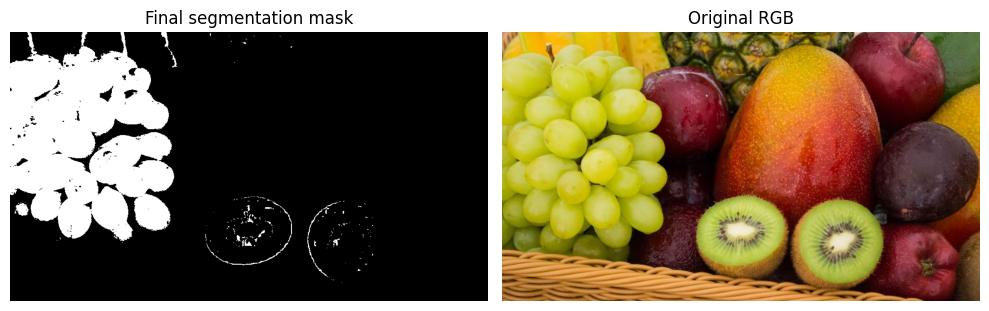

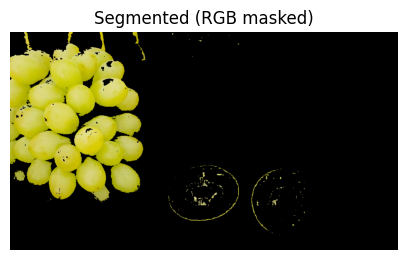

In [6]:
# Mostrar imagen RGB y máscara final
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(mask_final_u8, cmap='gray')
axs[0].set_title("Final segmentation mask")
axs[0].axis('off')

axs[1].imshow(img_rgb)
axs[1].set_title("Original RGB")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Opcional: aplicar la máscara para resaltar solo la fruta segmentada
segmented_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_final_u8)
show_rgb(segmented_rgb, "Segmented (RGB masked)")


### 6. Explicar el criterio empleado para segmentar la fruta y responder la pregunta de reflexión:

La imagen fue transformada al espacio de color HSV y se separaron los canales H, S y V. Se definió un rango de tono acotado al verde característico de las uvas (H entre 27 y 31), con el objetivo de evitar desviaciones hacia tonos amarillentos o rojizos presentes en otras frutas de la escena.

Para incrementar la robustez de la segmentación se añadieron restricciones en saturación y brillo. Se exigió una saturación alta (S ≥ 90) para descartar zonas blanquecinas o grisáceas, mientras que el brillo se limitó con un umbral inferior (V ≥ 165), que preserva uvas bien iluminadas, y un umbral superior (V ≤ 231), que reduce el efecto de reflejos intensos.

En la máscara final aún aparecen respuestas residuales en frutas como el kiwi o la piña, debido a que ciertos bordes o regiones comparten valores de tono y niveles de saturación/brillo similares. Esta superposición es esperable en escenas naturales con frutas de colores vivos. Como posible mejora fuera del alcance del ejercicio, podría aplicarse un posprocesamiento morfológico o la selección del componente más grande, con lo cual se reducirían estos efectos.

---
**Reflexión: ventajas de HSV frente a RGB para segmentar colores**

Trabajar en HSV ofrece una separación más nítida entre cromaticidad e iluminación. El canal de tono (H) concentra la información del color y resulta menos sensible a variaciones de luz que los canales de RGB, donde cromaticidad e intensidad se encuentran mezcladas. Además, la disponibilidad explícita de saturación y valor permite excluir de forma fundamentada e intuitiva regiones desaturadas y controlar áreas demasiado oscuras o excesivamente brillantes, tareas que en RGB exigirían combinaciones menos intuitivas de umbrales.


## 2. Detección de bordes en radiografía.
A partir de la  imagen de una radiografía, aplicar técnicas de
preprocesamiento y detección de bordes para resaltar las estructuras óseas.

### 1. Cargar la imagen, convertirla a escala de grises y visualizarla.

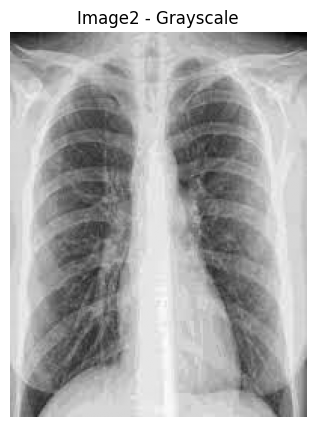

In [7]:
raw_url2 = "https://raw.githubusercontent.com/BrajanNieto/CompuVision/main/Lab01_Images/Image2.jpg"

def show_gray(img_gray, title=""):
    plt.figure(figsize=(6,5))
    plt.imshow(img_gray, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

with urlopen(raw_url2) as resp:
    img_bytes = resp.read()
img_array = np.frombuffer(img_bytes, np.uint8)
img_bgr = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convert to grayscale (for edge detection later)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Visualize
show_gray(img_gray, "Image2 - Grayscale")

### 2. Aplicar los filtros para reducción de ruido que considere más adecuados (media, mediana o gaussiano).

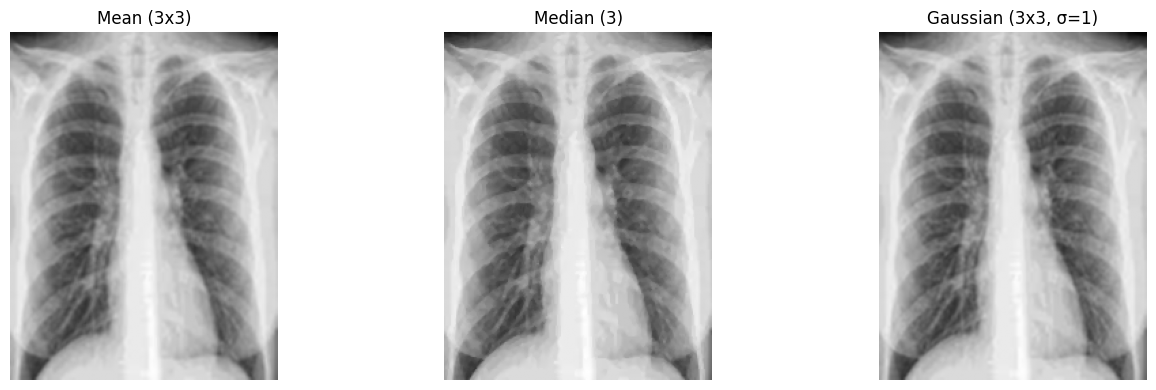

In [8]:
# Denoising filters
mean_blur    = cv2.blur(img_gray, (3, 3))                 # mean
median_blur  = cv2.medianBlur(img_gray, 3)                # median
gauss_blur   = cv2.GaussianBlur(img_gray, (3, 3), 1.0)    # gaussian

# Compare
fig, axs = plt.subplots(1, 3, figsize=(14,4))
axs[0].imshow(mean_blur, cmap="gray");   axs[0].set_title("Mean (3x3)");   axs[0].axis("off")
axs[1].imshow(median_blur, cmap="gray"); axs[1].set_title("Median (3)");   axs[1].axis("off")
axs[2].imshow(gauss_blur, cmap="gray");  axs[2].set_title("Gaussian (3x3, σ=1)"); axs[2].axis("off")
plt.tight_layout(); plt.show()


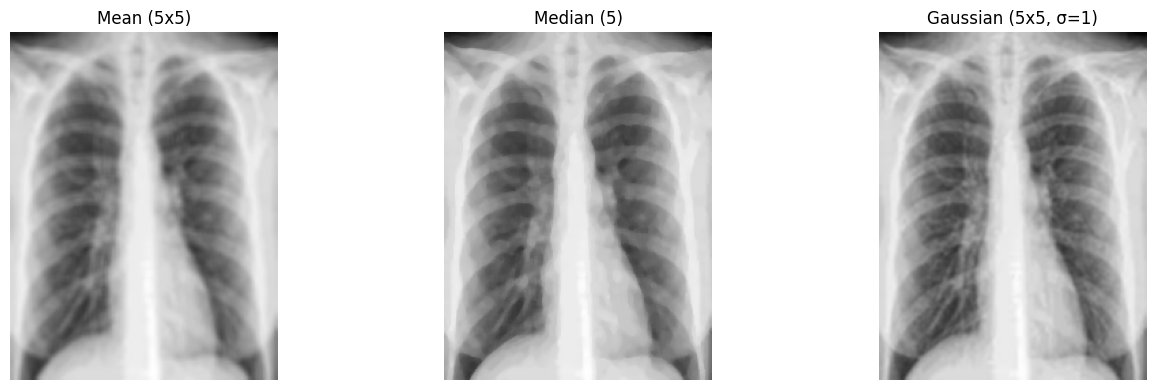

In [9]:
# Denoising filters
mean_blur    = cv2.blur(img_gray, (5, 5))                 # mean
median_blur  = cv2.medianBlur(img_gray, 5)                # median
gauss_blur   = cv2.GaussianBlur(img_gray, (5, 5), 1.0)    # gaussian

# Compare
fig, axs = plt.subplots(1, 3, figsize=(14,4))
axs[0].imshow(mean_blur, cmap="gray");   axs[0].set_title("Mean (5x5)");   axs[0].axis("off")
axs[1].imshow(median_blur, cmap="gray"); axs[1].set_title("Median (5)");   axs[1].axis("off")
axs[2].imshow(gauss_blur, cmap="gray");  axs[2].set_title("Gaussian (5x5, σ=1)"); axs[2].axis("off")
plt.tight_layout(); plt.show()

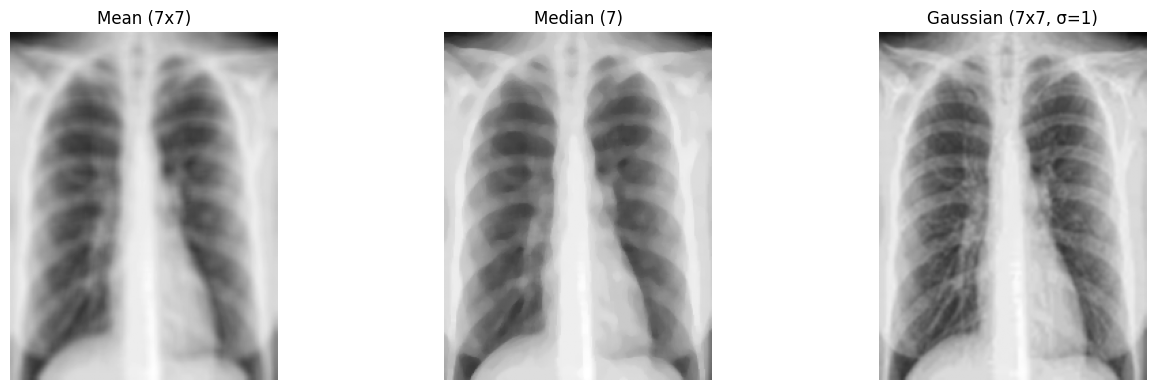

In [10]:
# Denoising filters
mean_blur    = cv2.blur(img_gray, (7, 7))                 # mean
median_blur  = cv2.medianBlur(img_gray, 7)                # median
gauss_blur   = cv2.GaussianBlur(img_gray, (7, 7), 1.0)    # gaussian

# Compare
fig, axs = plt.subplots(1, 3, figsize=(14,4))
axs[0].imshow(mean_blur, cmap="gray");   axs[0].set_title("Mean (7x7)");   axs[0].axis("off")
axs[1].imshow(median_blur, cmap="gray"); axs[1].set_title("Median (7)");   axs[1].axis("off")
axs[2].imshow(gauss_blur, cmap="gray");  axs[2].set_title("Gaussian (7x7, σ=1)"); axs[2].axis("off")
plt.tight_layout(); plt.show()

### 3. Visualizar la imagen mejorada con los filtros de reducción de ruido.

Tras comparar media, mediana y gaussiano en las figuras anteriores, se seleccionó el filtro gaussiano por su mejor compromiso entre reducción de ruido y preservación de estructura.

El filtro de media atenúa el ruido pero difumina con rapidez los bordes debido a su respuesta uniforme en el vecindario: promedia sin distinguir transiciones, por lo que “engorda” contornos y borra detalles finos. El filtro de mediana es muy eficaz frente a ruido impulsivo, pero dada la imagen usada (con gradientes suaves)  tiende a introducir planicies y pequeñas distorsiones geométricas que afectan las transiciones de intensidad propias del tejido y el hueso.

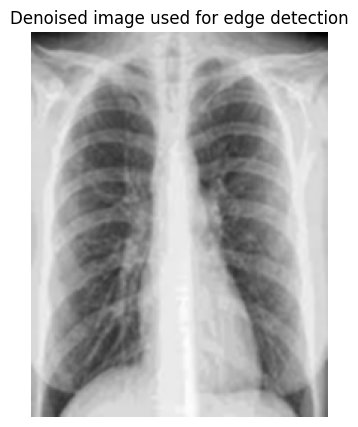

In [11]:
gauss_blur   = cv2.GaussianBlur(img_gray, (3, 3), 1.0)
filtered_gray = gauss_blur.copy()
show_gray(filtered_gray, "Denoised image used for edge detection")

### 4 y 5. Aplicar los operadores Sobel y Canny para la detección de bordes. Visualizar, comparar los resultados de ambas técnicas y seleccionar la que considere mejor.

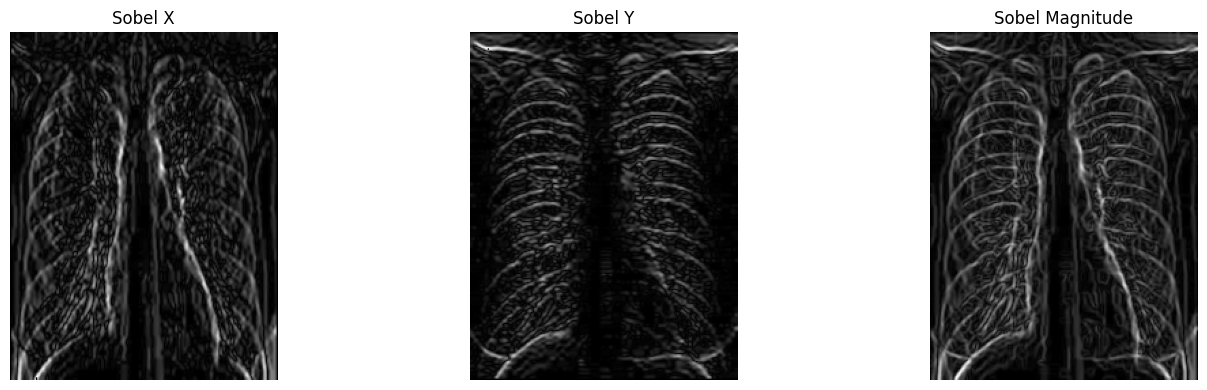

In [12]:
# Sobel gradients (on filtered grayscale)
sobelx = cv2.Sobel(filtered_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(filtered_gray, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude (normalize to 0-255 for display)
mag = np.sqrt(sobelx**2 + sobely**2)
mag = (255 * (mag / (mag.max() + 1e-8))).astype(np.uint8)

# Visualize Sobel results
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].imshow(np.abs(sobelx).astype(np.uint8), cmap="gray"); axs[0].set_title("Sobel X"); axs[0].axis("off")
axs[1].imshow(np.abs(sobely).astype(np.uint8), cmap="gray"); axs[1].set_title("Sobel Y"); axs[1].axis("off")
axs[2].imshow(mag, cmap="gray");                           axs[2].set_title("Sobel Magnitude"); axs[2].axis("off")
plt.tight_layout(); plt.show()


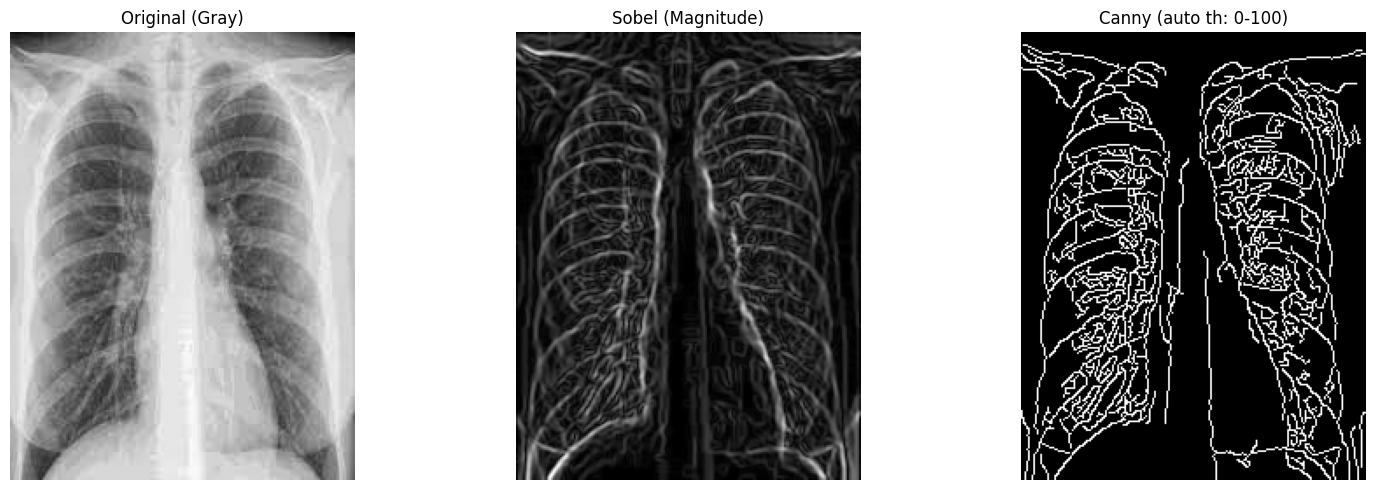

In [13]:
# Canny
sigma = 0.3
v = np.median(filtered_gray)
lower = int(max(0, (0.3 - sigma) * v))
upper = int(min(255, (0.3 + sigma) * v))

canny_edges = cv2.Canny(filtered_gray, lower, upper, L2gradient=True)

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs[0].imshow(img_gray, cmap="gray"); axs[0].set_title("Original (Gray)"); axs[0].axis("off")
axs[1].imshow(mag, cmap="gray");     axs[1].set_title("Sobel (Magnitude)"); axs[1].axis("off")
axs[2].imshow(canny_edges, cmap="gray"); axs[2].set_title(f"Canny (auto th: {lower}-{upper})"); axs[2].axis("off")
plt.tight_layout(); plt.show()


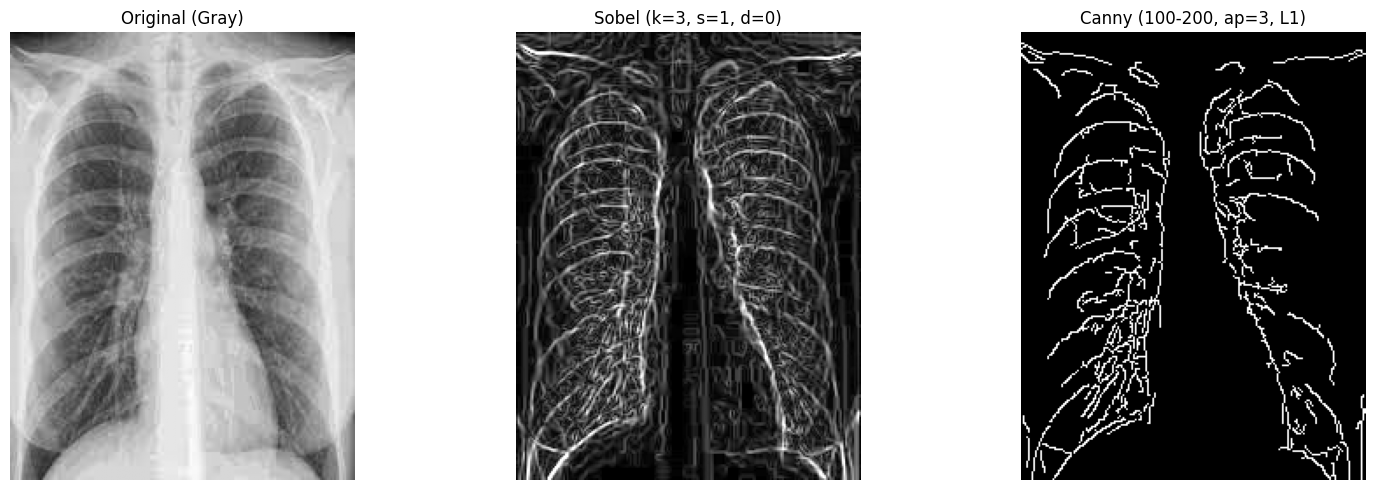

In [14]:
# --- Sobel---
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3, scale=1, delta=0)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3, scale=1, delta=0)
mag = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.float32)
mag = np.clip(mag, 0, 255).astype(np.uint8)

# --- Canny  ---
canny_edges = cv2.Canny(img_gray, 100, 200, apertureSize=3, L2gradient=False)

# --- Comparación lado a lado ---
fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs[0].imshow(img_gray, cmap="gray"); axs[0].set_title("Original (Gray)"); axs[0].axis("off")
axs[1].imshow(mag, cmap="gray");     axs[1].set_title("Sobel (k=3, s=1, d=0)"); axs[1].axis("off")
axs[2].imshow(canny_edges, cmap="gray"); axs[2].set_title("Canny (100-200, ap=3, L1)"); axs[2].axis("off")
plt.tight_layout(); plt.show()


### 6. Explicar el criterio empleado para seleccionar el/los filtro(s) y el operador de bordes, y responder a la pregunta de reflexión.

Para esta radiografía se buscó un compromiso entre reducción de ruido y conservación de bordes óseos (costillas, límites pulmonares). Tras comparar los filtros de media, mediana y gaussiano, se adoptó un suavizado gaussiano ligero como preprocesamiento recomendado porque atenúa el ruido de alta frecuencia de manera controlada —mediante σ— y preserva mejor las transiciones suaves características del tejido.

Para Sobel se fijó un kernel pequeño (ksize = 3, scale = 1, delta = 0) y se combinó la respuesta en X e Y mediante la magnitud del gradiente. Esta configuración privilegia el detalle fino y evita engrosar los contornos que aparecería con kernels mayores, a costa de una sensibilidad algo mayor al ruido de textura del parénquima.

Para Canny se utilizaron umbrales 100–200, apertureSize = 3 (derivadas sobre Sobel 3×3) y L2gradient = False. Este conjunto de parámetros produjo contornos delgados y bien conectados; ante sobre‐detección o pérdida de borde, el ajuste natural consiste en elevar o reducir el umbral inferior, respectivamente, o afinar σ del gaussiano.

---
**¿Cuál operador te dio un mejor resultado? ¿Por qué?**

El operador que dio mejor resultado para detectar solamente bordes de los huesos fue Canny, porque integra suavizado previo, calcula el gradiente y aplica supresión de no máximos, obteniendo contornos finos, estables y conectados, con menor sensibilidad al ruido que la magnitud de Sobel para esta radiografía.

## 3.  Segmentación de señales de tránsito por color y bordes

Segmentar la señal de ciclovía a partir de la siguiente imagen, utilizando
segmentación por color y detección de bordes.

### 1.  Cargar la imagen y visualizarla en el formato RGB correcto.

Image  RGB


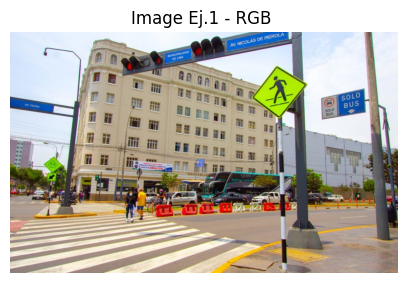

In [15]:
# URL del repositorio
raw_url3 = "https://raw.githubusercontent.com/BrajanNieto/CompuVision/main/Lab01_Images/Image3.jpg"

# Cargar bytes y decodificar con OpenCV
with urlopen(raw_url3) as resp:
    img_bytes3 = resp.read()
img_array3 = np.frombuffer(img_bytes3, np.uint8)
img_bgr = cv2.imdecode(img_array3, cv2.IMREAD_COLOR)
# Convertir BGR->RGB para visualizar correctamente
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print('Image  RGB')
show_rgb(img_rgb, "Image Ej.1 - RGB ")

### 2. Convertir la imagen a un espacio de color HSV.

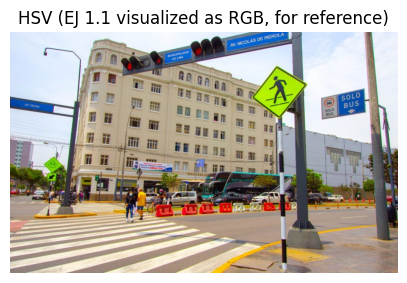

In [16]:
# BGR -> HSV (OpenCV usa H en [0,179], S y V en [0,255])
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Mostrar HSV convertido a RGB solo con fines de visualización
img_hsv_to_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
show_rgb(img_hsv_to_rgb, "HSV (EJ 1.1 visualized as RGB, for reference)")

 ### 3. Visualizar las bandas R, G, B, H, S, y V.

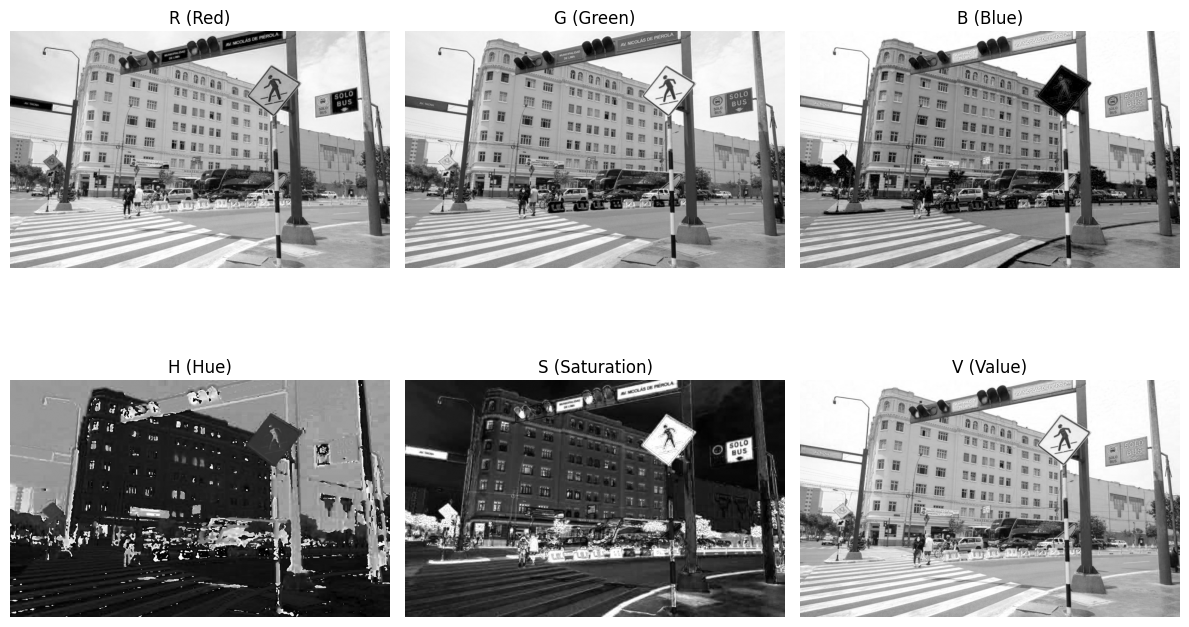

In [17]:
# Separar canales RGB
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Separar canales HSV
H, S, V = cv2.split(img_hsv)  # H: [0-179], S: [0-255], V: [0-255]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0,0].imshow(R, cmap='gray'); axs[0,0].set_title("R (Red)"); axs[0,0].axis('off')
axs[0,1].imshow(G, cmap='gray'); axs[0,1].set_title("G (Green)"); axs[0,1].axis('off')
axs[0,2].imshow(B, cmap='gray'); axs[0,2].set_title("B (Blue)"); axs[0,2].axis('off')

axs[1,0].imshow(H, cmap='gray'); axs[1,0].set_title("H (Hue)"); axs[1,0].axis('off')
axs[1,1].imshow(S, cmap='gray'); axs[1,1].set_title("S (Saturation)"); axs[1,1].axis('off')
axs[1,2].imshow(V, cmap='gray'); axs[1,2].set_title("V (Value)"); axs[1,2].axis('off')

plt.tight_layout()
plt.show()

### 4. Experimentar con diferentes umbrales en las bandas para poder segmentar de la mejor forma la señal de ciclovía.

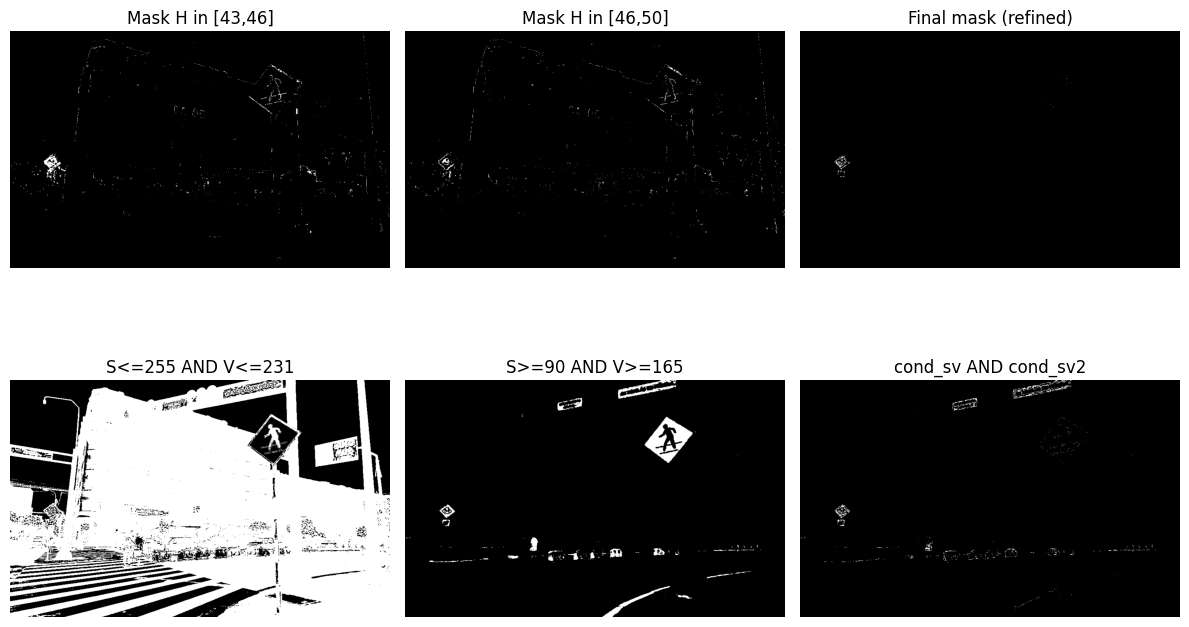

In [18]:
H, S, V = cv2.split(img_hsv)  # H:[0-179], S:[0-255], V:[0-255]
# Rango  bajo
lower1 = np.array([43.5,   0, 0], dtype=np.uint8)
upper1 = np.array([46,  255, 255], dtype=np.uint8)
mask1 = cv2.inRange(img_hsv, lower1, upper1)
# Rango alto
lower2 = np.array([46, 0, 0], dtype=np.uint8)
upper2 = np.array([50, 255, 255], dtype=np.uint8)
mask2 = cv2.inRange(img_hsv, lower2, upper2)
# Unión (logical OR) de ambos rangos
mask_hsv = np.logical_or(mask1 > 0, mask2 > 0)
# --- refinar con condiciones en S y V ---
cond_sv = np.logical_and(S <= 252, V <= 217)
cond_sv2 = np.logical_and(S >= 210, V >= 200)
mask_final = np.logical_and(mask_hsv, np.logical_and(cond_sv, cond_sv2))


# --- Visualización de condiciones ---
mask_final_u8 = (mask_final.astype(np.uint8)) * 255
mask_cond_sv = (cond_sv.astype(np.uint8)) * 255
mask_cond_sv2 = (cond_sv2.astype(np.uint8)) * 255
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
# Fila superior: H (dos rangos) + máscara final
axs[0,0].imshow(mask1, cmap='gray'); axs[0,0].set_title(f"Mask H in [{lower1[0]},{upper1[0]}]"); axs[0,0].axis('off')
axs[0,1].imshow(mask2, cmap='gray'); axs[0,1].set_title(f"Mask H in [{lower2[0]},{upper2[0]}]"); axs[0,1].axis('off')
axs[0,2].imshow(mask_final_u8, cmap='gray'); axs[0,2].set_title("Final mask (refined)"); axs[0,2].axis('off')
# Fila inferior: cond_sv, cond_sv2 y su intersección
axs[1,0].imshow(mask_cond_sv, cmap='gray'); axs[1,0].set_title("S<=255 AND V<=231"); axs[1,0].axis('off')
axs[1,1].imshow(mask_cond_sv2, cmap='gray'); axs[1,1].set_title("S>=90 AND V>=165"); axs[1,1].axis('off')
axs[1,2].imshow((np.logical_and(cond_sv, cond_sv2).astype(np.uint8)) * 255, cmap='gray'); axs[1,2].set_title("cond_sv AND cond_sv2"); axs[1,2].axis('off')
plt.tight_layout(); plt.show()

### 5. Visualizar tanto la imagen original en formato RGB como la máscara de segmentación por color de la señal de tránsito

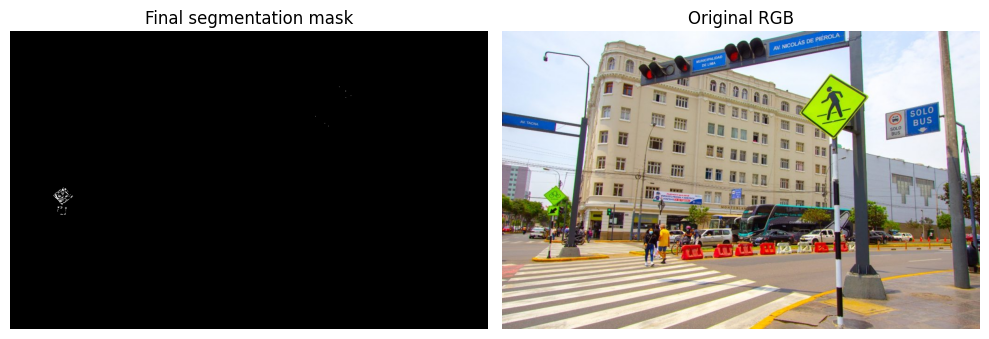

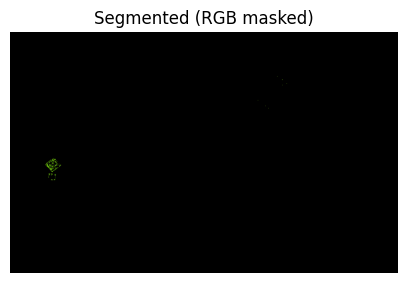

In [19]:
# Mostrar imagen RGB y máscara final
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(mask_final_u8, cmap='gray')
axs[0].set_title("Final segmentation mask")
axs[0].axis('off')

axs[1].imshow(img_rgb)
axs[1].set_title("Original RGB")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Opcional: aplicar la máscara para resaltar solo la fruta segmentada
segmented_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_final_u8)
show_rgb(segmented_rgb, "Segmented (RGB masked)")


### 6. Explicar el criterio empleado para segmentar la señal de tránsito por color:

En HSV se fijó primero la cromaticidad mediante un acotamiento estrecho del tono en H ∈ [43, 50], que coincide con el matiz dominante de la señal. Para refinar la selección y reducir falsos positivos, se impusieron ventanas simultáneas de saturación y brillo: S ∈ [210, 252] para asegurar color plenamente definido (excluyendo zonas blanquecinas o desaturadas) y V ∈ [200, 217] para estabilizar la respuesta frente a sombras y reflejos intensos. La máscara final se obtuvo aplicando la intersección lógica (AND) entre la máscara de tono y ambas condiciones sobre S y V, preservando así píxeles altamente saturados y de luminancia controlada dentro del tono objetivo. En síntesis, el procedimiento —análogo al del primer ejercicio— prioriza la región cromática propia de la señal y suprime gran parte del fondo y de los elementos cercanos que, aun con matices similares, no cumplen simultáneamente los niveles exigidos de saturación y brillo.



### 7. Aplicar el operador de Canny para la detección de bordes sobre la máscara de segmentación por color y experimentar con los parámetros del operador.

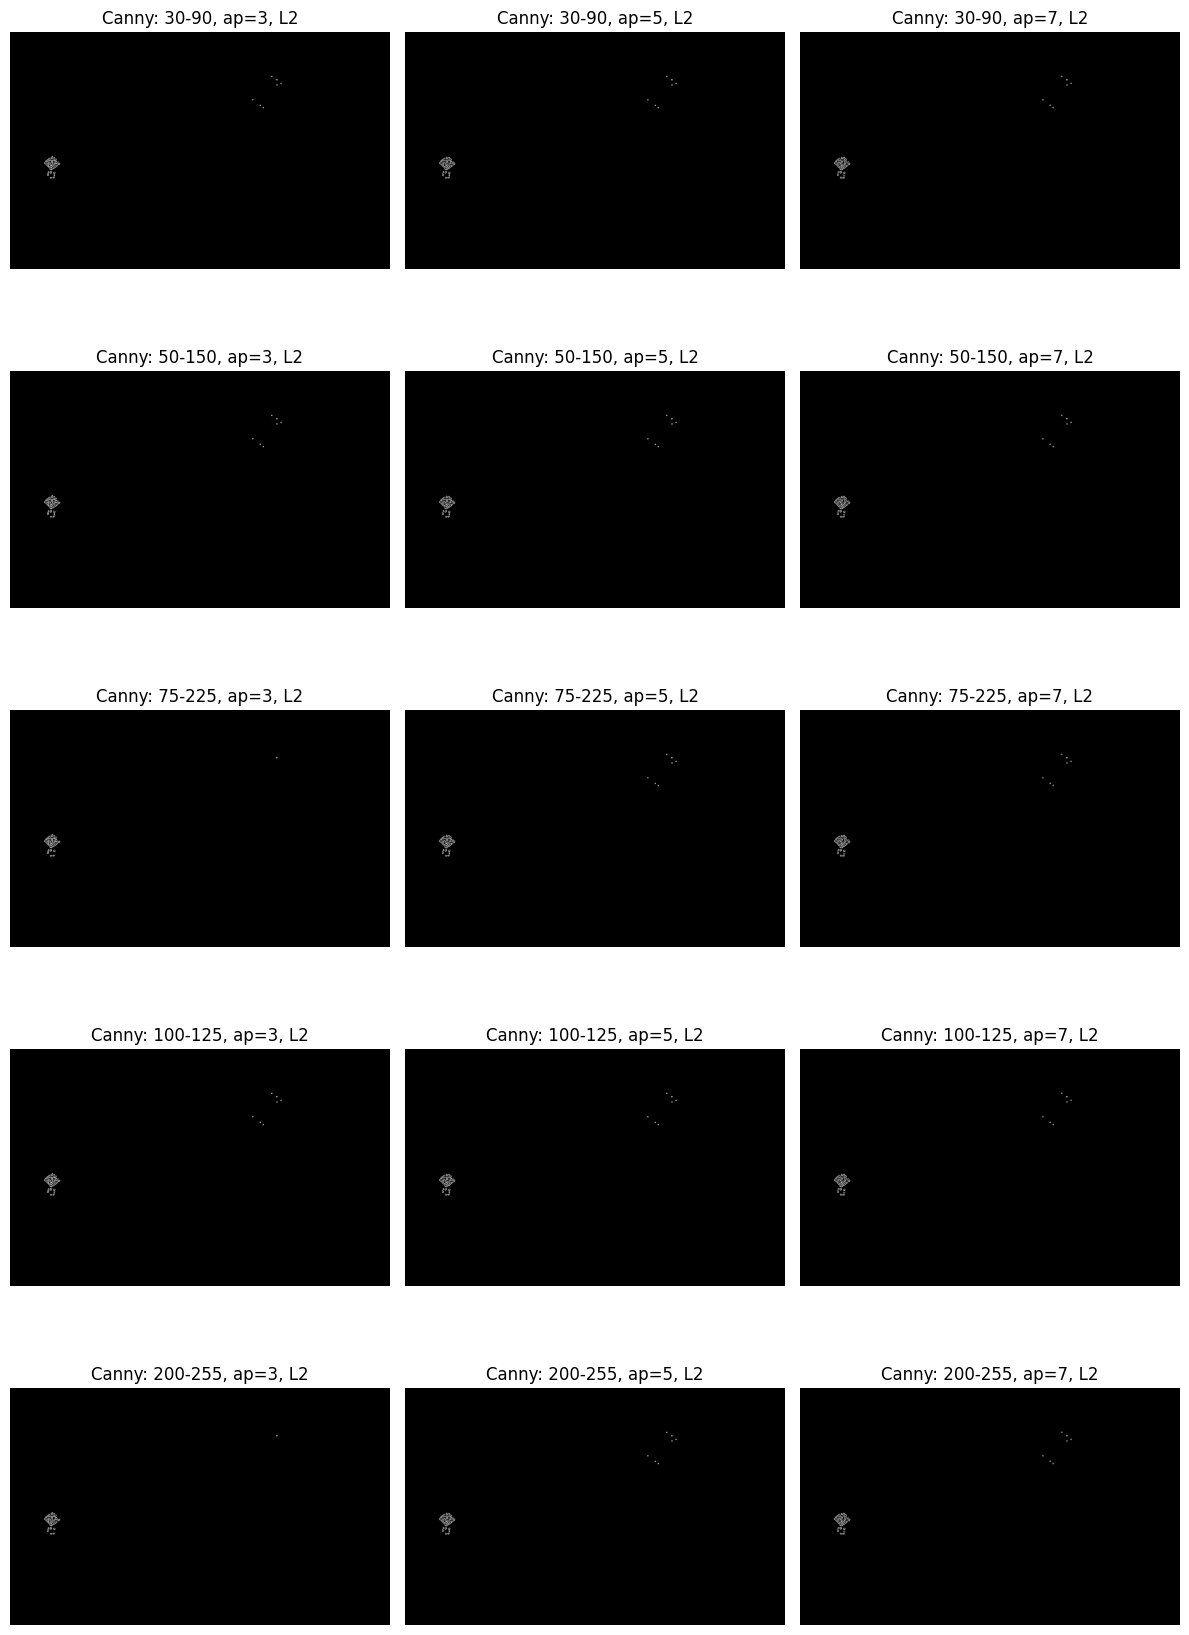

In [20]:
edges_input = cv2.GaussianBlur(mask_final_u8, (3, 3), 0)
threshold_pairs = [(30, 90), (50, 150), (75, 225), (100,125) , (200, 255)]
apertures = [3, 5, 7]  # usa derivadas Sobel 3x3 o 5x5

# Grid de resultados Canny
rows = len(threshold_pairs)
cols = len(apertures)
fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows))
axs = np.atleast_2d(axs)

for r, (lo, hi) in enumerate(threshold_pairs):
    for c, ap in enumerate(apertures):
        edges = cv2.Canny(edges_input, lo, hi, apertureSize=ap, L2gradient=True)
        axs[r, c].imshow(edges, cmap="gray")
        axs[r, c].set_title(f"Canny: {lo}-{hi}, ap={ap}, L2")
        axs[r, c].axis("off")

plt.tight_layout(); plt.show()

### 8. Visualizar la imagen original en formato RGB, la máscara de segmentación por color y la máscara de bordes (derecha, centro e izquierda respectivamente).


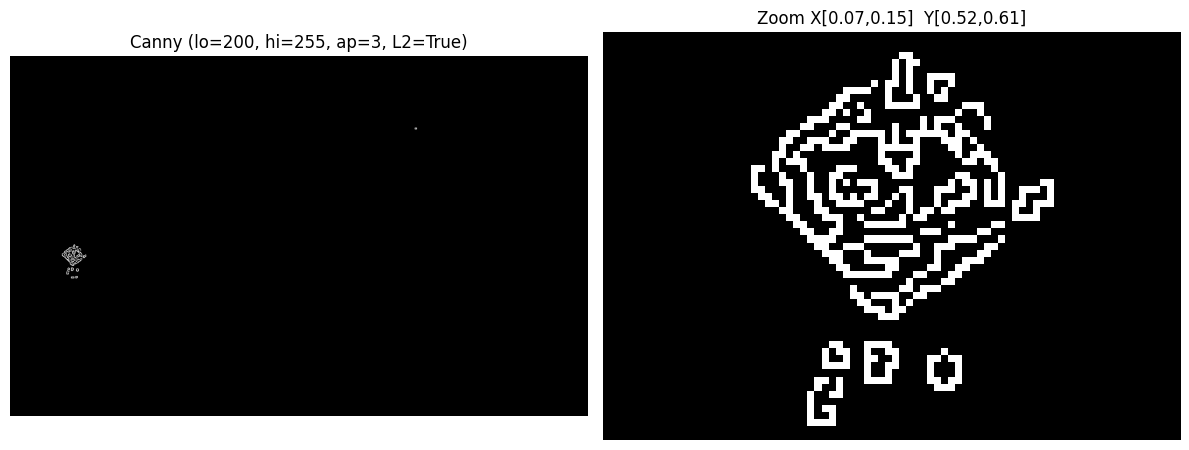

In [21]:
# CANNY
lower_thr = 200
upper_thr = 255
aperture  = 3
use_L2    = True

x_start_frac = 0.07
x_end_frac   = 0.15
y_start_frac = 0.52
y_end_frac   = 0.61

edges_input = cv2.GaussianBlur(mask_final_u8, (3, 3), 0)

edges = cv2.Canny(edges_input, lower_thr, upper_thr, apertureSize=aperture, L2gradient=use_L2)

# =====  ZOOM =====
h, w = edges.shape[:2]
xs = int(np.clip(x_start_frac * w, 0, w-1))
xe = int(np.clip(x_end_frac   * w, 0, w))
ys = int(np.clip(y_start_frac * h, 0, h-1))
ye = int(np.clip(y_end_frac   * h, 0, h))
if xe <= xs: xe = min(w, xs + 1)
if ye <= ys: ye = min(h, ys + 1)

zoom_edges = edges[ys:ye, xs:xe]

# ===== ZOOM =====
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(edges, cmap='gray')
axs[0].set_title(f"Canny (lo={lower_thr}, hi={upper_thr}, ap={aperture}, L2={use_L2})")
axs[0].axis('off')

axs[1].imshow(zoom_edges, cmap='gray')
axs[1].set_title(f"Zoom X[{x_start_frac:.2f},{x_end_frac:.2f}]  Y[{y_start_frac:.2f},{y_end_frac:.2f}]")
axs[1].axis('off')

plt.tight_layout()
plt.show()


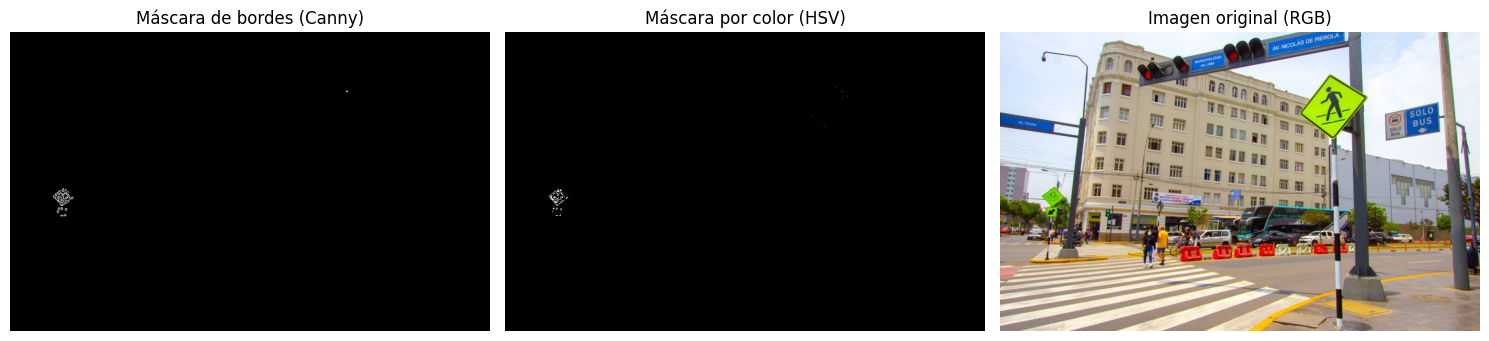

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[2].imshow(img_rgb)
axs[2].set_title("Imagen original (RGB)")
axs[2].axis('off')

axs[1].imshow(mask_final_u8, cmap='gray')
axs[1].set_title("Máscara por color (HSV)")
axs[1].axis('off')

axs[0].imshow(edges, cmap='gray')
axs[0].set_title("Máscara de bordes (Canny)")
axs[0].axis('off')

plt.tight_layout()
plt.show()

### 9. Analizar y responder a la pregunta de reflexión.
**¿Qué efecto tiene modificar el umbral del operador Canny?**

Con base en las pruebas realizadas en los ejercicios 2 y 3 se observa que los umbrales bajos incrementan notablemente la sensibilidad del detector, generando una mayor cantidad de contornos visibles, aunque acompañados de más ruido en la imagen. En contraste, cuando se emplean umbrales altos, la cantidad de ruido disminuye y los bordes que permanecen resultan más claros y definidos, pero existe el riesgo de perder detalles sutiles o estructuras con bajo contraste que también forman parte de la información relevante.

Es importante considerar que, aunque el algoritmo de Canny incluye un proceso de supresión de no máximos que mantiene los bordes delgados, los valores de los umbrales son los que determinan qué bordes sobreviven y cómo se conectan entre sí. A partir de las pruebas también se comprobó que este efecto depende del preprocesamiento aplicado antes de la detección. Por ejemplo, un filtrado gaussiano fuerte contribuye a reducir el ruido, pero al mismo tiempo suaviza los bordes débiles, lo que obliga a elegir umbrales más bajos para no perder información fina.